<a href="https://colab.research.google.com/github/melaniaczobit/Loan-Approval/blob/main/Loan_Approval_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension
!pip install matplotlib
!pip install graphviz

**Data Preparation**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving german_credit.csv to german_credit (4).csv


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['german_credit.csv']))
df.head(5)

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,1,1,2


In [ ]:
df.describe()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [ ]:
print (df.isnull().values.any())

False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account Balance                    1000 non-null   int64
 2   Duration of Credit (month)         1000 non-null   int64
 3   Payment Status of Previous Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit Amount                      1000 non-null   int64
 6   Value Savings/Stocks               1000 non-null   int64
 7   Length of current employment       1000 non-null   int64
 8   Instalment per cent                1000 non-null   int64
 9   Sex & Marital Status               1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration in Current address        1000 non-null   int64
 12  Most valuable availab

In [ ]:
from pandas.api.types import CategoricalDtype

integer_cols = ['Duration of Credit (month)', 'Credit Amount', 'Instalment per cent','Age (years)','No of Credits at this Bank','No of dependents']
for col in df.columns:
    if col not in integer_cols:
        df[col] = df[col].astype('category')

In [ ]:
df.dtypes

Creditability                        category
Account Balance                      category
Duration of Credit (month)              int64
Payment Status of Previous Credit    category
Purpose                              category
Credit Amount                           int64
Value Savings/Stocks                 category
Length of current employment         category
Instalment per cent                     int64
Sex & Marital Status                 category
Guarantors                           category
Duration in Current address          category
Most valuable available asset        category
Age (years)                             int64
Concurrent Credits                   category
Type of apartment                    category
No of Credits at this Bank              int64
Occupation                           category
No of dependents                        int64
Telephone                            category
Foreign Worker                       category
dtype: object

In [ ]:
df.describe()

,Duration of Credit (month),Credit Amount,Instalment per cent,Age (years),No of Credits at this Bank,No of dependents
count,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000
mean,20.903000,3271.24800,2.973000,35.54200,1.407000,1.155000
std,12.058814,2822.75176,1.118715,11.35267,0.577654,0.362086
min,4.000000,250.00000,1.000000,19.00000,1.000000,1.000000
25%,12.000000,1365.50000,2.000000,27.00000,1.000000,1.000000
50%,18.000000,2319.50000,3.000000,33.00000,1.000000,1.000000
75%,24.000000,3972.25000,4.000000,42.00000,2.000000,1.000000
max,72.000000,18424.00000,4.000000,75.00000,4.000000,2.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Creditability                      1000 non-null   category
 1   Account Balance                    1000 non-null   category
 2   Duration of Credit (month)         1000 non-null   int64   
 3   Payment Status of Previous Credit  1000 non-null   category
 4   Purpose                            1000 non-null   category
 5   Credit Amount                      1000 non-null   int64   
 6   Value Savings/Stocks               1000 non-null   category
 7   Length of current employment       1000 non-null   category
 8   Instalment per cent                1000 non-null   int64   
 9   Sex & Marital Status               1000 non-null   category
 10  Guarantors                         1000 non-null   category
 11  Duration in Current address        1000 non-

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
 
corr_matrix=df.corr()
sns.heatmap(corr_matrix, cmap='YlGnBu',annot=True)

In [ ]:
def removeOutlier(df, col, iMax=0.997, iMin=0.003):
    for i in col:
        var = str(i)

        min_threshold = df[var].quantile(iMin)
        max_threshold = df[var].quantile(iMax)

        df = df[(df[var] > min_threshold)]
        df = df[(df[var] < max_threshold)]

    return(df)

names = ["Duration of Credit (month)", "Credit Amount"]

df = removeOutlier(df, names, iMax=0.997, iMin=0.003)


In [ ]:
df['Creditability'].value_counts()

1    683
0    291
Name: Creditability, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Separate input features (X) and target variable (y)
y = df.Creditability
X = df.drop('Creditability', axis=1)
 
# Train model
clf_0 = LogisticRegression().fit(X, y)
 
# Predict on training set
pred_y_0 = clf_0.predict(X)

print( accuracy_score(pred_y_0, y) )

In [ ]:
from sklearn.utils import resample

df_majority = df[df.Creditability==1]
df_minority = df[df.Creditability==0]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=683)   # to match majority class
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.Creditability.value_counts()

1    683
0    683
Name: Creditability, dtype: int64

In [ ]:
df_upsampled.describe()

,Duration of Credit (month),Credit Amount,Instalment per cent,Age (years),No of Credits at this Bank,No of dependents
count,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000
mean,21.137628,3329.016837,3.005857,35.083455,1.396047,1.155930
std,11.286483,2825.531298,1.124471,11.177374,0.563049,0.362922
min,5.000000,339.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1367.250000,2.000000,26.000000,1.000000,1.000000
50%,18.000000,2327.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,4165.000000,4.000000,42.000000,2.000000,1.000000
max,54.000000,15672.000000,4.000000,75.000000,4.000000,2.000000


In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

y = df_upsampled.Creditability
X = df_upsampled.drop('Creditability', axis=1)
 
# Train model
clf_1 = LogisticRegression().fit(X, y)
 
# Predict on training set
pred_y_1 = clf_1.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_1 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_1) )

[0 1]
0.6954612005856515


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Decision Tree 1:** All attributes

In [ ]:
# First split the data into train and test set
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
# Our class column is Creditability here and everything else will be used as features 
feature_names=df_upsampled.columns[df_upsampled.columns != 'Creditability']
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(df_upsampled.loc[:, feature_names], df_upsampled['Creditability'], test_size=0.3,random_state=1) 

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)
print("Successfuly trained the decision tree...")

Successfuly trained the decision tree...


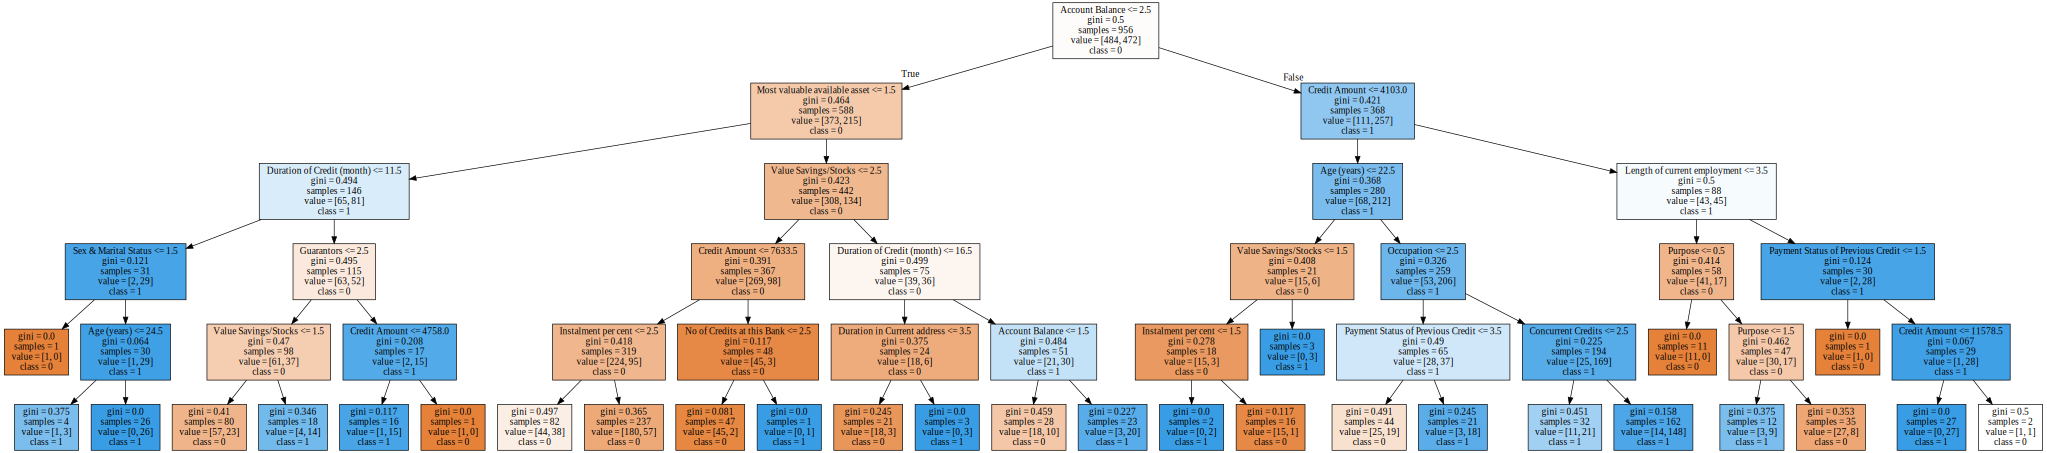

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_names,  
                                class_names=["0","1"],
                                filled=True)
# Plot tree
graph = graphviz.Source(dot_data, format="png") 
graph


In [ ]:
# Let's make the prdictions on the test set  that we set aside earlier using the trained tree
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[167  32]
 [ 82 129]]
TP:  129 , FP:  32 , TN:  167 , FN: 82


In [ ]:
#print precision, recall, and accuracy from the perspective of each of the class (0 and 1 for German dataset)
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.84      0.75       199
           1       0.80      0.61      0.69       211

    accuracy                           0.72       410
   macro avg       0.74      0.73      0.72       410
weighted avg       0.74      0.72      0.72       410



**Decision Tree 2:**
Lets eliminate some attributes. This will be a subjective decision


Eliminate: Telephone, Sex & Marital Status, Duration in Current Address


In [ ]:
df_upsampled = df_upsampled.drop('Telephone',1)
df_upsampled = df_upsampled.drop('Sex & Marital Status',1)
df_upsampled = df_upsampled.drop('Duration in Current address',1)
df_upsampled = df_upsampled.drop('Purpose',1)
df_upsampled.head(5)

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Guarantors,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Foreign Worker
0,1,1,18,4,1049,1,2,4,1,2,21,3,1,1,3,1,1
1,1,1,9,4,2799,1,3,2,1,1,36,3,1,2,3,2,1
2,1,2,12,2,841,2,4,2,1,1,23,3,1,1,2,1,1
3,1,1,12,4,2122,1,3,3,1,1,39,3,1,2,2,2,2
4,1,1,12,4,2171,1,3,4,1,2,38,1,2,2,2,1,2


In [ ]:
# First split the data into train and test set
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
# Our class column is Creditability here and everything else will be used as features 
feature_names=df_upsampled.columns[df_upsampled.columns != 'Creditability']
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(df_upsampled.loc[:, feature_names], df_upsampled['Creditability'], test_size=0.3,random_state=1) 

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion="gini",max_depth=3, ccp_alpha=0)
clf = clf.fit(X_train, y_train)
print("Successfuly trained the decision tree...")

Successfuly trained the decision tree...


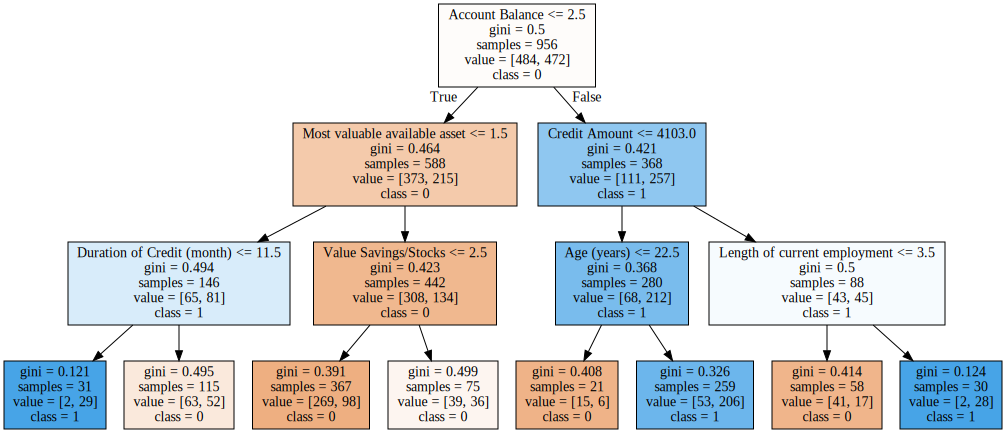

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_names,  
                                class_names=["0","1"],
                                filled=True)
# Plot tree
graph = graphviz.Source(dot_data, format="png") 
graph

In [ ]:
# Let's make the prdictions on the test set  that we set aside earlier using the trained tree
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

#print precision, recall, and accuracy from the perspective of each of the class (0 and 1 for German dataset)
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

Confusion Matrix
[[168  31]
 [ 88 123]]
TP:  123 , FP:  31 , TN:  168 , FN: 88
              precision    recall  f1-score   support

           0       0.66      0.84      0.74       199
           1       0.80      0.58      0.67       211

    accuracy                           0.71       410
   macro avg       0.73      0.71      0.71       410
weighted avg       0.73      0.71      0.71       410



**Naive Bayes:** Filtered Dataset

In [ ]:
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()

#Train the model using the training sets
nb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = nb.predict(X_test)

In [ ]:
print ("Total Columns (including class)",len(df_upsampled.columns))

Total Columns (including class) 17


In [ ]:
print("Number of features used ",nb.n_features_)
print("Classes ",nb.classes_)
print("Number of records for classes ",nb.class_count_)
print("Log prior probability for classes ", nb.class_log_prior_)
print("Log conditional probability for each feature given a class\n",nb.feature_log_prob_)

Number of features used  16
Classes  [0 1]
Number of records for classes  [484. 472.]
Log prior probability for classes  [-0.68067301 -0.70577893]
Log conditional probability for each feature given a class
 [[-7.54186909 -5.07969466 -7.42270388 -0.02262458 -7.75238523 -7.10107422
  -7.10575807 -8.10851158 -7.27966443 -4.70737514 -7.29413413 -7.58424831
  -7.90419125 -7.14823021 -8.06207467 -8.22059789]
 [-6.98269025 -5.05004116 -7.01027821 -0.0281062  -7.20526707 -6.76667712
  -6.93256922 -7.85679937 -7.2109489  -4.44174911 -7.01183342 -7.36906438
  -7.64678511 -6.94123354 -7.86772844 -7.96983824]]


In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.40      0.48       199
           1       0.57      0.73      0.64       211

    accuracy                           0.57       410
   macro avg       0.58      0.57      0.56       410
weighted avg       0.58      0.57      0.56       410

